# 0. 기본 세팅

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# Scikit-learn (전처리, 모델링, 튜닝, 평가)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

# XGBoost
from xgboost import XGBClassifier

# 시각화 스타일
plt.style.use('ggplot')

In [63]:
# 데이터 로드
train_df = pd.read_csv(r'C:\Users\rudak\Downloads\training.csv')
test_df = pd.read_csv(r'C:\Users\rudak\Downloads\test.csv')
print(f"Train Data: {train_df.shape}")
print(f"Test Data: {test_df.shape}")

Train Data: (170883, 32)
Test Data: (113923, 31)


# 1. EDA

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [65]:
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
train_df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [67]:
test_df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,...,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000,113923.000000
mean,227844.000000,145396.169808,0.254759,-0.061154,-0.739555,-0.176137,0.264150,-0.087346,0.120988,-0.048337,...,-0.046430,0.042428,0.125609,0.033672,-0.013512,-0.138398,-0.018897,-0.003140,-0.003667,89.867850
std,32886.881696,14553.200321,2.084808,1.708359,1.402141,1.461789,1.399511,1.381543,1.269186,1.140927,...,0.831851,0.718441,0.788888,0.678614,0.615591,0.567769,0.468657,0.420530,0.361528,256.236008
min,170883.000000,120396.000000,-46.855047,-50.383269,-48.325589,-5.683171,-113.743307,-20.869626,-23.386192,-39.688571,...,-54.497720,-21.620120,-7.417140,-36.666000,-2.790479,-8.696627,-1.855355,-9.895244,-15.430084,0.000000
25%,199363.500000,132928.500000,-0.803531,-0.691506,-1.598860,-0.978315,-0.437285,-0.880171,-0.491675,-0.273015,...,-0.247537,-0.223898,-0.534543,-0.142571,-0.382480,-0.450968,-0.313872,-0.075609,-0.062317,5.950000
50%,227844.000000,145247.000000,0.117889,-0.005846,-0.734520,-0.337083,0.250458,-0.389808,0.153525,-0.035902,...,-0.104920,0.036139,0.186973,0.040791,0.016358,-0.193153,-0.041566,-0.009555,-0.028507,22.450000
75%,256324.500000,157639.500000,1.978707,0.803286,0.121444,0.431529,0.882923,0.309498,0.746755,0.285891,...,0.091959,0.253758,0.750595,0.227957,0.524460,0.221885,0.214766,0.093824,0.078238,78.000000
max,284805.000000,172788.000000,2.454930,12.730564,3.937048,15.304184,29.162172,73.301626,120.589494,12.766112,...,23.643417,20.063786,8.272233,22.528412,4.584549,6.070850,3.415636,31.612198,16.129609,25691.160000


타겟 클래스 분포 비율:
Class
0    0.997893
1    0.002107
Name: proportion, dtype: float64


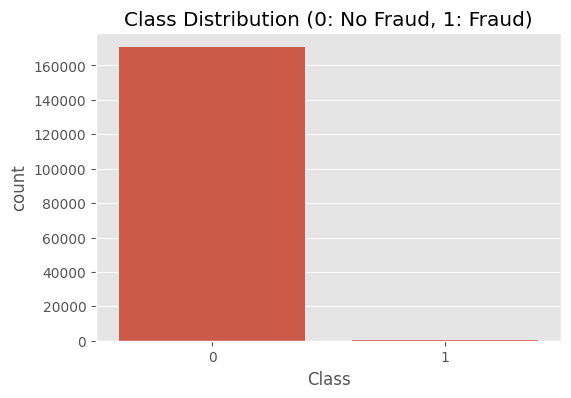

In [68]:
# 타겟(Class) 분포 시각화
print('타겟 클래스 분포 비율:')
print(train_df['Class'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=train_df)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

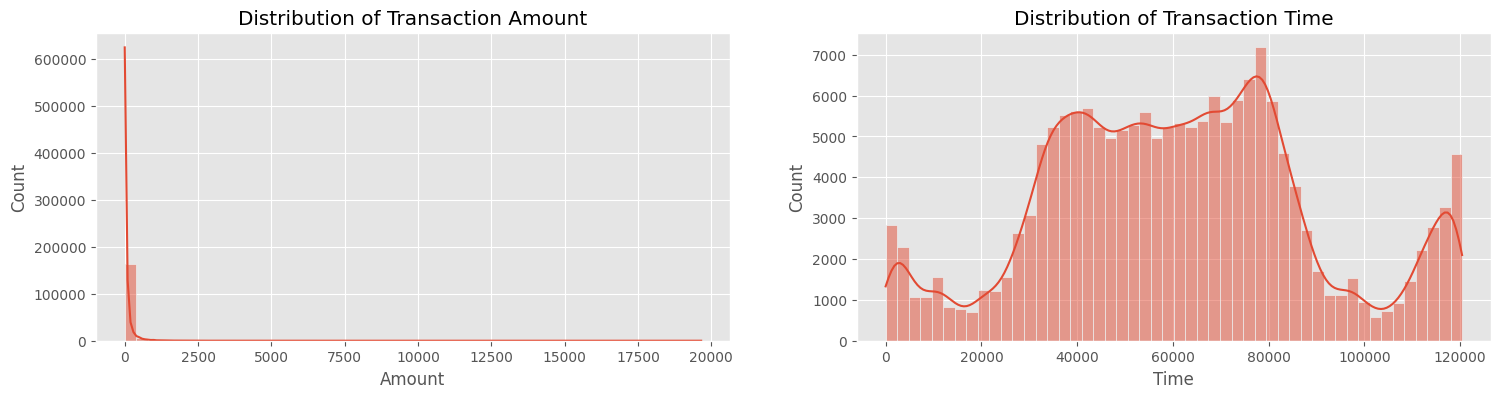

In [69]:
# Amount와 Time 분포 시각화
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(train_df['Amount'], bins=50, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Amount')
sns.histplot(train_df['Time'], bins=50, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Time')
plt.show()

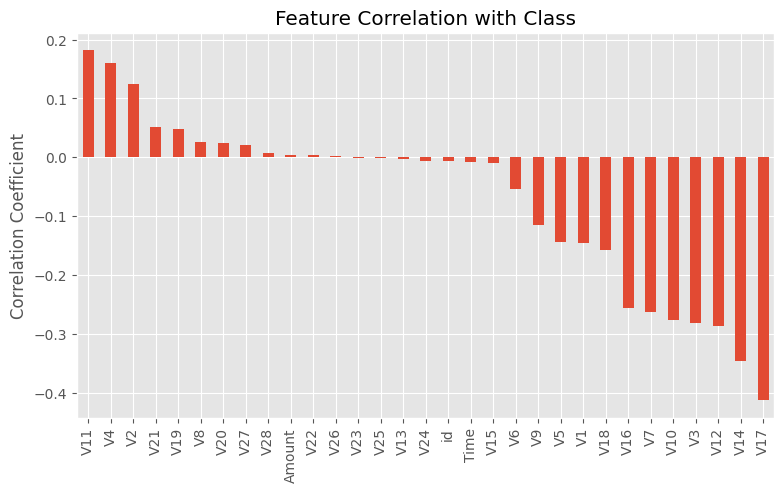

In [70]:
# Class와의 상관관계 확인
# 어떤 변수가 Class(사기 여부)와 가장 관련이 깊은지 확인
corr = train_df.corr()
plt.figure(figsize=(9, 5))
# Class와의 상관계수만 추출하여 막대그래프로 시각화
corr['Class'].sort_values(ascending=False).drop('Class').plot(kind='bar')
plt.title('Feature Correlation with Class')
plt.ylabel('Correlation Coefficient')
plt.show()

사기 탐지에 가장 영향력이 큰 변수들: ['V17', 'V14', 'V12', 'V3', 'V10', 'V7']


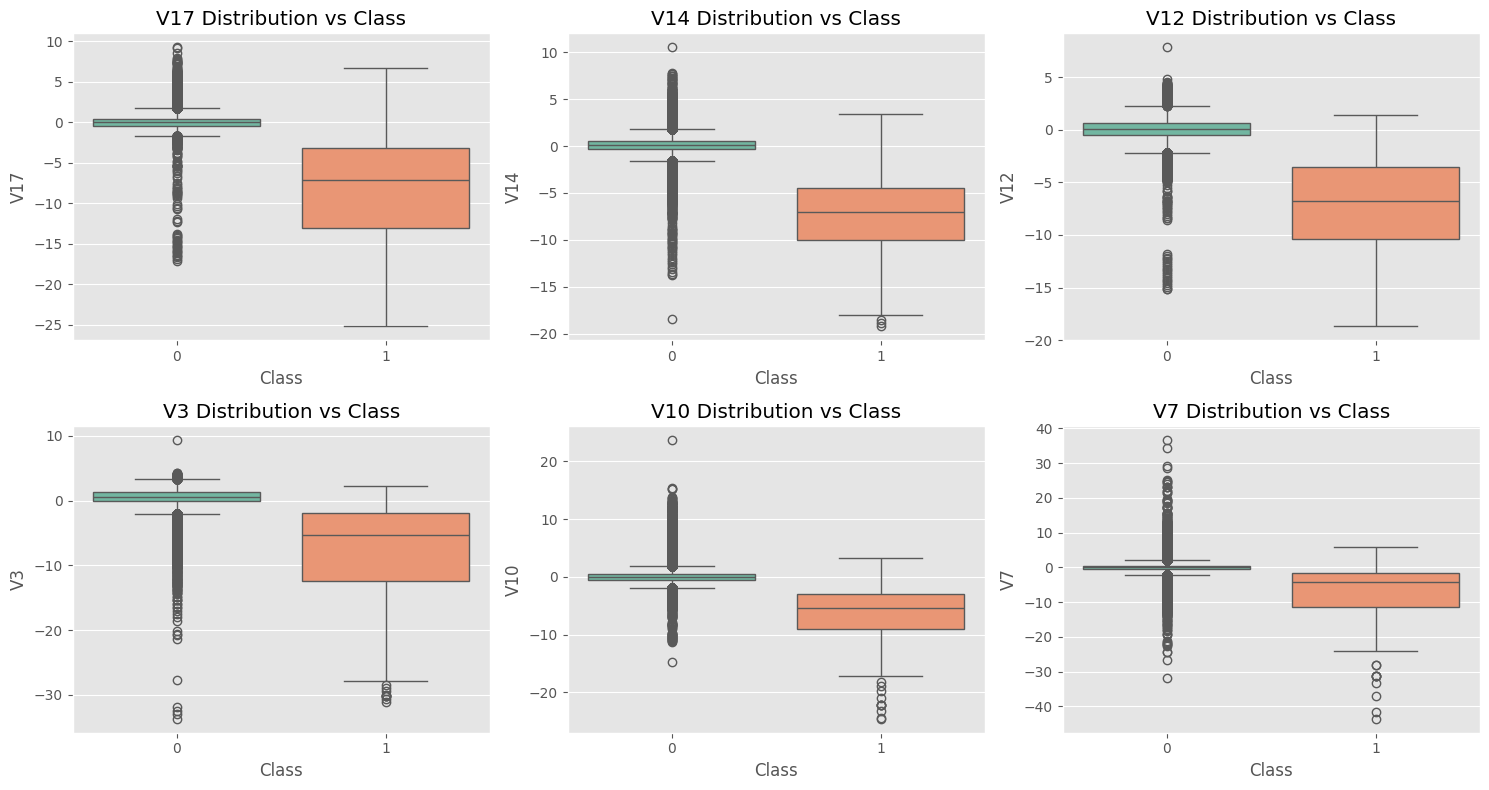

In [71]:
# 상관계수 절댓값이 높은 상위 6개만 뽑아서 시각
corr_abs = corr['Class'].drop('Class').abs().sort_values(ascending=False)
top_features = corr_abs.index[:6]

print(f"사기 탐지에 가장 영향력이 큰 변수들: {top_features.tolist()}")

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    # Boxplot으로 정상(0) vs 사기(1) 분포 비교
    sns.boxplot(x='Class', y=col, data=train_df, palette='Set2')
    plt.title(f'{col} Distribution vs Class')

plt.tight_layout()
plt.show()

In [72]:
# 데이터 탐색 및 시각화를 통해 얻은 인사이트
# 1. 극단적인 클래스 불균형 (사기거래 비율이 0.3% 수준)
# 2. Amount 그래프 : 대부분의 거래가 소액인데(0 근처), 소수 극단값의 아웃라이어 존재
#    >>> 이상치 처리 필요 (극단값의 왜곡 가능성 제거 위해 standard 대신 robust가 합리적으로 보임)
# 3. class와 상관관계가 높은 변수들의 박스플롯 보니까 정상거래는 1Q ~ 3Q 분포가 0에 가까운 반면, 사기거래는 음수에 분포
# Time 변수를 쓸까말까 고민했는데, 위에서 describe 해보니까, train 데이터와 test 데이터의 시간대 분포가 달라서 의미가 없을 것 같음. 과적합 이슈도 있고...


In [73]:
# time 드롭해버리기
train_df.drop('Time', axis=1, inplace=True)

# id도 학습에 필요 없으니까 지워버리자
train_df.drop('id', axis=1, inplace=True)

# 2. 데이터 전처리 및 분할

In [74]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
scaler = RobustScaler()

# 1. 학습 데이터(train_df) 스케일링
train_df[['scaled_amount']] = scaler.fit_transform(train_df[['Amount']])
train_df.drop(['Amount'], axis=1, inplace=True)

# 2. 테스트 데이터(test_df) 스케일링
test_df[['scaled_amount']] = scaler.transform(test_df[['Amount']])
test_df.drop(['Amount'], axis=1, inplace=True)

# 모델 학습을 위한 X, y 분리
X = train_df.drop('Class', axis=1)
y = train_df['Class']

print(X.shape)

(170883, 29)


In [75]:
from sklearn.model_selection import train_test_split

# 학습/검증 데이터 분할 (Stratify로 비율 유지)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=20260204, stratify=y)

X_train = np.ascontiguousarray(X_train)
X_val = np.ascontiguousarray(X_val)
y_train = np.ascontiguousarray(y_train)
y_val = np.ascontiguousarray(y_val)
test_np = np.ascontiguousarray(test_df)

print(f"학습 데이터: {X_train.shape}, 검증 데이터: {X_val.shape}")

학습 데이터: (136706, 29), 검증 데이터: (34177, 29)


# 3. 하이퍼파라미터 튜닝 및 불균형 처리

In [76]:
# 불균형 비율 계산 (정상 / 사기)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
print(f"불균형 비율(scale_pos_weight): {ratio:.2f}")

불균형 비율(scale_pos_weight): 473.67


In [77]:
# 기본 XGBoost 모델 설정
xgb = XGBClassifier(
    scale_pos_weight=ratio,   
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=20260204
)

In [78]:
# 탐색할 파라미터 그리드
param_grid = {
    'n_estimators': [100, 300],        # 나무의 개수
    'max_depth': [6, 10, 15],          # 나무의 깊이 (복잡도)
    'learning_rate': [0.05, 0.1, 0.2], # 학습률
    'subsample': [0.8],                # 과적합 방지용 샘플링 비율
    # 'reg_alpha': [0.1],              # 필요시 L1 규제 추가 가능
}

In [79]:
# GridSearchCV 설정 (F1 Score 기준 최적화)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,         
    n_jobs=-1,
    verbose=1
)

In [80]:
# 최적 파라미터 찾자
grid_search.fit(X_train, y_train)

print(f"\n최적 파라미터: {grid_search.best_params_}")
print(f"최고 F1 Score (CV 평균): {grid_search.best_score_:.4f}")

# 최적 모델 저장
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits

최적 파라미터: {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 100, 'subsample': 0.8}
최고 F1 Score (CV 평균): 0.8814


# 4. 모델 선택 및 성능 비교

In [81]:
# 1. Logistic Regression (가중치 적용)
lr_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=20260204)

# 2. Random Forest (가중치 적용)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=12, n_jobs=-1, random_state=20260204)

# 3. Best XGBoost (GridSearch로 찾은 모델 사용)
# best_xgb는 이미 정의됨

models = [('LogisticRegression', lr_clf), ('RandomForest', rf_clf), ('Tuned XGBoost', best_xgb)]

print(">>> [개별 모델 성능 비교 (Validation Set)]")
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    score = f1_score(y_val, pred)
    print(f"[{name}] F1-Score: {score:.4f}")

>>> [개별 모델 성능 비교 (Validation Set)]
[LogisticRegression] F1-Score: 0.1806
[RandomForest] F1-Score: 0.8310
[Tuned XGBoost] F1-Score: 0.8759



[최종 앙상블 모델 평가 결과]
오차 행렬 (Confusion Matrix)
[[34093    12]
 [   12    60]]
정확도: 0.9993, 정밀도: 0.8333, 재현율: 0.8333, F1: 0.8333


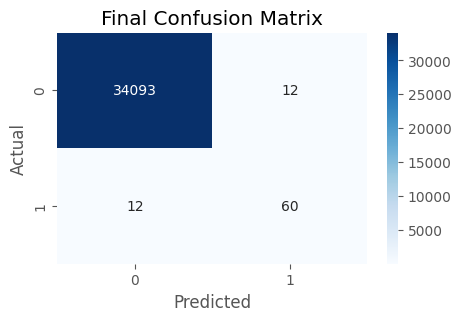

In [82]:
# Soft Voting Ensemble 정의
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lr', lr_clf),
        ('rf', rf_clf)
    ],
    voting='soft' 
)

# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)
ens_pred = voting_clf.predict(X_val)

# 평가 함수 정의
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('\n[최종 앙상블 모델 평가 결과]')
    print('오차 행렬 (Confusion Matrix)')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title('Final Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 최종 평가 실행
get_clf_eval(y_val, ens_pred)

In [83]:
# 로지스틱 회귀가 성능이 너무 낮은데, 이걸 섞어서 써버리니까 앙상블 f1 스코어가 tuned xgb f1스코어보다 낮음
# 로지스틱 빼고 2개만 합쳐보자

In [84]:
two_model_voting = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', rf_clf) 
        # ('lr', lr_clf)  <-- 얘는 뺐습니다!
    ],
    voting='soft'
)

# [XGB + RF] 2개 모델 앙상블 시도
two_model_voting.fit(X_train, y_train)
two_pred = two_model_voting.predict(X_val)
score_2 = f1_score(y_val, two_pred)

print(f"[XGB + RF]   F1: {score_2:.4f}")

[XGB + RF]   F1: 0.8696


In [85]:
# 2개만 해도 결국 tuned xgb 보다는 f1스코어가 낮음. 걍 tuned xgb로 모델 최종선정 ㄱㄱ

# 마무리

In [ ]:
# 최종 모델 선정
# 실험 결과 앙상블보다 단일 모델 성능이 더 좋아보임

In [ ]:
# # 1. 제출용 ID 저장
# submit_id = test_df['id']

# # 2. 예측을 위한 데이터 준비 (X_test_final)
# X_test_final = test_df.drop(['Time', 'id', 'Amount', 'Class'], axis=1, errors='ignore')

# # 3. 예측 수행
# final_pred = best_xgb.predict(X_test_final)

# # 4. 제출 파일 생성
# submission = pd.DataFrame({
#     'id': submit_id,
#     'Class': final_pred})

# # 파일 저장
# submission.to_csv('submission.csv', index=False)
# print(submission.head())

In [ ]:
# 앙상블(랜덤 + xgb)도 한번 해보자

In [89]:
# 1. 제출용 ID 저장
submit_id = test_df['id']

# 2. 예측을 위한 데이터 준비 (X_test_final)
X_test_final = test_df.drop(['Time', 'id', 'Amount', 'Class'], axis=1, errors='ignore')

# 3. 예측 수행
final_pred = two_model_voting.predict(X_test_final)

# 4. 제출 파일 생성
submission = pd.DataFrame({
    'id': submit_id,
    'Class': final_pred})

# 파일 저장
submission.to_csv('submission.csv', index=False)
print(submission.head())

       id  Class
0  170883      0
1  170884      0
2  170885      0
3  170886      0
4  170887      0
